## 实例37：卷积函数的使用

In [1]:
# -*- coding: utf-8 -*-
import tensorflow as tf  
  
# [batch, in_height, in_width, in_channels] [训练时一个batch的图片数量, 图片高度, 图片宽度, 图像通道数]  
input = tf.Variable(tf.constant(1.0,shape = [1, 5, 5, 1])) 
input2 = tf.Variable(tf.constant(1.0,shape = [1, 5, 5, 2]))
input3 = tf.Variable(tf.constant(1.0,shape = [1, 4, 4, 1])) 

# [filter_height, filter_width, in_channels, out_channels] [卷积核的高度，卷积核的宽度，图像通道数，卷积核个数]   
filter1 =  tf.Variable(tf.constant([-1.0,0,0,-1],shape = [2, 2, 1, 1]))
filter2 =  tf.Variable(tf.constant([-1.0,0,0,-1,-1.0,0,0,-1],shape = [2, 2, 1, 2])) 
filter3 =  tf.Variable(tf.constant([-1.0,0,0,-1,-1.0,0,0,-1,-1.0,0,0,-1],shape = [2, 2, 1, 3])) 
filter4 =  tf.Variable(tf.constant([-1.0,0,0,-1,
                                   -1.0,0,0,-1,
                                   -1.0,0,0,-1,
                                   -1.0,0,0,-1],shape = [2, 2, 2, 2])) 
filter5 =  tf.Variable(tf.constant([-1.0,0,0,-1,-1.0,0,0,-1],shape = [2, 2, 2, 1])) 



# padding的值为‘VALID’，表示边缘不填充, 当其为‘SAME’时，表示填充到卷积核可以到达图像边缘  
op1 = tf.nn.conv2d(input, filter1, strides=[1, 2, 2, 1], padding='SAME') #1个通道输入，生成1个feature ma
op2 = tf.nn.conv2d(input, filter2, strides=[1, 2, 2, 1], padding='SAME') #1个通道输入，生成2个feature map
op3 = tf.nn.conv2d(input, filter3, strides=[1, 2, 2, 1], padding='SAME') #1个通道输入，生成3个feature map

op4 = tf.nn.conv2d(input2, filter4, strides=[1, 2, 2, 1], padding='SAME') # 2个通道输入，生成2个feature
op5 = tf.nn.conv2d(input2, filter5, strides=[1, 2, 2, 1], padding='SAME') # 2个通道输入，生成一个feature map

vop1 = tf.nn.conv2d(input, filter1, strides=[1, 2, 2, 1], padding='VALID') # 5*5 对于pading不同而不同
op6 = tf.nn.conv2d(input3, filter1, strides=[1, 2, 2, 1], padding='SAME') 
vop6 = tf.nn.conv2d(input3, filter1, strides=[1, 2, 2, 1], padding='VALID')  #4*4与pading无关
  


init = tf.global_variables_initializer()  
with tf.Session() as sess:  
    sess.run(init)  
    
    print("op1:\n",sess.run([op1,filter1]))#1-1  后面补0
    print("------------------")
    
    print("op2:\n",sess.run([op2,filter2])) #1-2多卷积核 按列取
    print("op3:\n",sess.run([op3,filter3])) #1-3
    print("------------------")   
    
    print("op4:\n",sess.run([op4,filter4]))#2-2    通道叠加
    print("op5:\n",sess.run([op5,filter5]))#2-1        
    print("------------------")
  
    print("op1:\n",sess.run([op1,filter1]))#1-1
    print("vop1:\n",sess.run([vop1,filter1]))
    print("op6:\n",sess.run([op6,filter1]))
    print("vop6:\n",sess.run([vop6,filter1]))    

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Colocations handled automatically by placer.
op1:
 [array([[[[-2.],
         [-2.],
         [-1.]],

        [[-2.],
         [-2.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.]]]], dtype=float32), array([[[[-1.]],

        [[ 0.]]],


       [[[ 0.]],

        [[-1.]]]], dtype=float32)]
------------------
op2:
 [array([[[[-2., -2.],
         [-2., -2.],
         [-2.,  0.]],

        [[-2., -2.],
         [-2., -2.],
         [-2.,  0.]],

        [[-1., -1.],
         [-1., -1.],
         [-1.,  0.]]]], dtype=float32), array([[[[-1.,  0.]],

        [[ 0., -1.]]],


       [[[-1.,  0.]],

        [[ 0., -1.]]]], dtype=float32)]
op3:
 [array([[[[-2., -2., -2.],
         [-2., -2., -2.],
         [-1., -1., -1.]],

        [[-2., -2., -2.],
         [-2., -2., -2.],
         [-1., -1., -1.]],

        [[-2., -1.,  0.],
         [-2., -1.,  0.],
         [-1.,  0.,  0.]]]], dtype=float32), array([[[[-1.,  0.,  0.]],

        [[-1., -1.,  0

## 实例38：使用卷积提取图片的轮廓
sobel算子：将彩色的图片生成带有边缘化信息的图片。

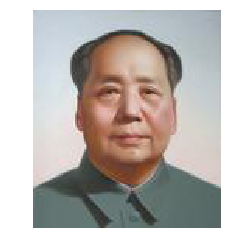

(140, 121, 3)


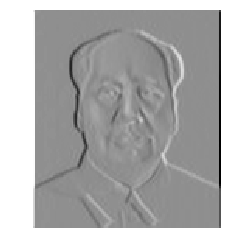

In [4]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
import tensorflow as tf  


myimg = mpimg.imread('img.jpg') # 读取和代码处于同一目录下的图片
plt.imshow(myimg) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
print(myimg.shape)


full=np.reshape(myimg,[1,140, 121, 3])  
inputfull = tf.Variable(tf.constant(1.0,shape = [1, 140, 121, 3]))

filter =  tf.Variable(tf.constant([[-1.0,-1.0,-1.0],  [0,0,0],  [1.0,1.0,1.0],
                                    [-2.0,-2.0,-2.0], [0,0,0],  [2.0,2.0,2.0],
                                    [-1.0,-1.0,-1.0], [0,0,0],  [1.0,1.0,1.0]],shape = [3, 3, 3, 1]))                                    

op = tf.nn.conv2d(inputfull, filter, strides=[1, 1, 1, 1], padding='SAME') #3个通道输入，生成1个feature ma
o=tf.cast(  ((op-tf.reduce_min(op))/(tf.reduce_max(op)-tf.reduce_min(op)) ) *255 ,tf.uint8)



with tf.Session() as sess:  
    sess.run(tf.global_variables_initializer()  )  

    t,f=sess.run([o,filter],feed_dict={ inputfull:full})
    #print(f)
    t=np.reshape(t,[140, 121]) 
 
    plt.imshow(t,cmap='Greys_r') # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.show()

## 实例39：池化函数的使用
tf.nn.max_pool(input, ksize, strides, padding, name = None)
tf.nn.avg_pool(input, ksize, strides, padding, name = None)

In [5]:
# -*- coding: utf-8 -*-
import tensorflow as tf  
  
img=tf.constant([  
        [[0.0,4.0],[0.0,4.0],[0.0,4.0],[0.0,4.0]],  
        [[1.0,5.0],[1.0,5.0],[1.0,5.0],[1.0,5.0]],  
        [[2.0,6.0],[2.0,6.0],[2.0,6.0],[2.0,6.0]],  
        [[3.0,7.0],[3.0,7.0], [3.0,7.0],[3.0,7.0]]
    ])  
  
img=tf.reshape(img,[1,4,4,2])  
  
pooling=tf.nn.max_pool(img,[1,2,2,1],[1,2,2,1],padding='VALID')  
pooling1=tf.nn.max_pool(img,[1,2,2,1],[1,1,1,1],padding='VALID')
pooling2=tf.nn.avg_pool(img,[1,4,4,1],[1,1,1,1],padding='SAME')  
pooling3=tf.nn.avg_pool(img,[1,4,4,1],[1,4,4,1],padding='SAME') 
nt_hpool2_flat = tf.reshape(tf.transpose(img), [-1, 16]) 
pooling4=tf.reduce_mean(nt_hpool2_flat,1) #1对行求均值（1表示轴是列）   0 对列求均值


with tf.Session() as sess:  
    print("image:")  
    image=sess.run(img)  
    print (image)  
    result=sess.run(pooling)  
    print ("reslut:\n",result)  
    result=sess.run(pooling1)  
    print ("reslut1:\n",result)     
    result=sess.run(pooling2)  
    print ("reslut2:\n",result)
    result=sess.run(pooling3)  
    print ("reslut3:\n",result) 
    flat,result=sess.run([nt_hpool2_flat,pooling4])  
    print ("reslut4:\n",result) 
    print("flat:\n",flat)     

image:
[[[[0. 4.]
   [0. 4.]
   [0. 4.]
   [0. 4.]]

  [[1. 5.]
   [1. 5.]
   [1. 5.]
   [1. 5.]]

  [[2. 6.]
   [2. 6.]
   [2. 6.]
   [2. 6.]]

  [[3. 7.]
   [3. 7.]
   [3. 7.]
   [3. 7.]]]]
reslut:
 [[[[1. 5.]
   [1. 5.]]

  [[3. 7.]
   [3. 7.]]]]
reslut1:
 [[[[1. 5.]
   [1. 5.]
   [1. 5.]]

  [[2. 6.]
   [2. 6.]
   [2. 6.]]

  [[3. 7.]
   [3. 7.]
   [3. 7.]]]]
reslut2:
 [[[[1.  5. ]
   [1.  5. ]
   [1.  5. ]
   [1.  5. ]]

  [[1.5 5.5]
   [1.5 5.5]
   [1.5 5.5]
   [1.5 5.5]]

  [[2.  6. ]
   [2.  6. ]
   [2.  6. ]
   [2.  6. ]]

  [[2.5 6.5]
   [2.5 6.5]
   [2.5 6.5]
   [2.5 6.5]]]]
reslut3:
 [[[[1.5 5.5]]]]
reslut4:
 [1.5 5.5]
flat:
 [[0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.]
 [4. 5. 6. 7. 4. 5. 6. 7. 4. 5. 6. 7. 4. 5. 6. 7.]]


In [9]:
# -*- coding: utf-8 -*-

#放在cifar目录下
from cifar10 import cifar10_input
import tensorflow as tf
import pylab 
import numpy as np

#取数据
batch_size = 12
data_dir = '/tmp/cifar10_data/cifar-10-batches-bin'
images_test, labels_test = cifar10_input.inputs(eval_data = True, data_dir = data_dir, batch_size = batch_size)


#sess = tf.InteractiveSession()
#tf.global_variables_initializer().run()
#tf.train.start_queue_runners()
#image_batch, label_batch = sess.run([images_test, labels_test])
#print("__\n",image_batch[0])
#
#print("__\n",label_batch[0])
#pylab.imshow(image_batch[0])
#pylab.show()
#

sess = tf.Session()
tf.global_variables_initializer().run(session=sess)
tf.train.start_queue_runners(sess=sess)
image_batch, label_batch = sess.run([images_test, labels_test])
print("__\n",image_batch[0])

print("__\n",label_batch[0])
pylab.imshow(  (image_batch[0]-np.min(image_batch[0]))  / (np.max(image_batch[0])-np.min(image_batch[0]) )   )
pylab.show()

#with tf.Session() as sess:
#    tf.global_variables_initializer().run()
#    tf.train.start_queue_runners()
#    image_batch, label_batch = sess.run([images_test, labels_test])
#    print("__\n",image_batch[0])
#    
#    print("__\n",label_batch[0])
#    pylab.imshow(image_batch[0])
#    pylab.show()


ImportError: No module named 'cifar10_input'